In [1]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv("C:\\Users\\prern\\OneDrive\\Documents\\covid_19_india.csv")

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter data for the year 2020
data_2020 = data[data['Date'].dt.year == 2020]

# Extract data for any three months of 2020 (you can choose specific months)
months = [3, 6, 9]  # Example: March, June, September

for month in months:
    # Filter data for a specific month
    data_month = data_2020[data_2020['Date'].dt.month == month]

    # Group data by State/UnionTerritory and find maximum cases reported for confirmed, deaths, and recovered
    max_cases = data_month.groupby('State/UnionTerritory').agg({
        'Confirmed': 'max',
        'Deaths': 'max',
        'Cured': 'max',
        'Date': 'first'  # Date when the maximum cases were reported
    })

    # Display the results
    print(f"Max cases reported for {month}/2020")
    print(max_cases)
    print("\n")


Max cases reported for 3/2020
                             Confirmed  Deaths  Cured       Date
State/UnionTerritory                                            
Andaman and Nicobar Islands         10       0      0 2020-03-26
Andhra Pradesh                      40       0      1 2020-03-12
Bihar                               15       1      0 2020-03-22
Chandigarh                          13       0      0 2020-03-19
Chhattisgarh                         8       0      0 2020-03-19
Delhi                               97       2      6 2020-03-02
Goa                                  5       0      0 2020-03-26
Gujarat                             73       6      3 2020-03-20
Haryana                             40       0     21 2020-03-04
Himachal Pradesh                     3       1      0 2020-03-21
Jammu and Kashmir                   54       2      2 2020-03-09
Karnataka                           83       3      5 2020-03-09
Kerala                             234       1     19 2020-0

In [2]:

# Filter data for the 6th day of each month
cases_on_6th_day = data[data['Date'].dt.day == 6]

# Display the number of cases on the 6th day of each month
cases_on_6th_day_count = cases_on_6th_day.groupby(data['Date'].dt.strftime('%Y-%m')).size()
print(cases_on_6th_day_count)


Date
2020-02     1
2020-03     6
2020-04    30
2020-05    33
2020-06    36
2020-07    36
2020-08    35
2020-09    35
2020-10    35
2020-11    35
2020-12    35
2021-01    36
2021-02    36
2021-03    36
2021-04    36
2021-05    36
2021-06    36
2021-07    36
2021-08    36
dtype: int64


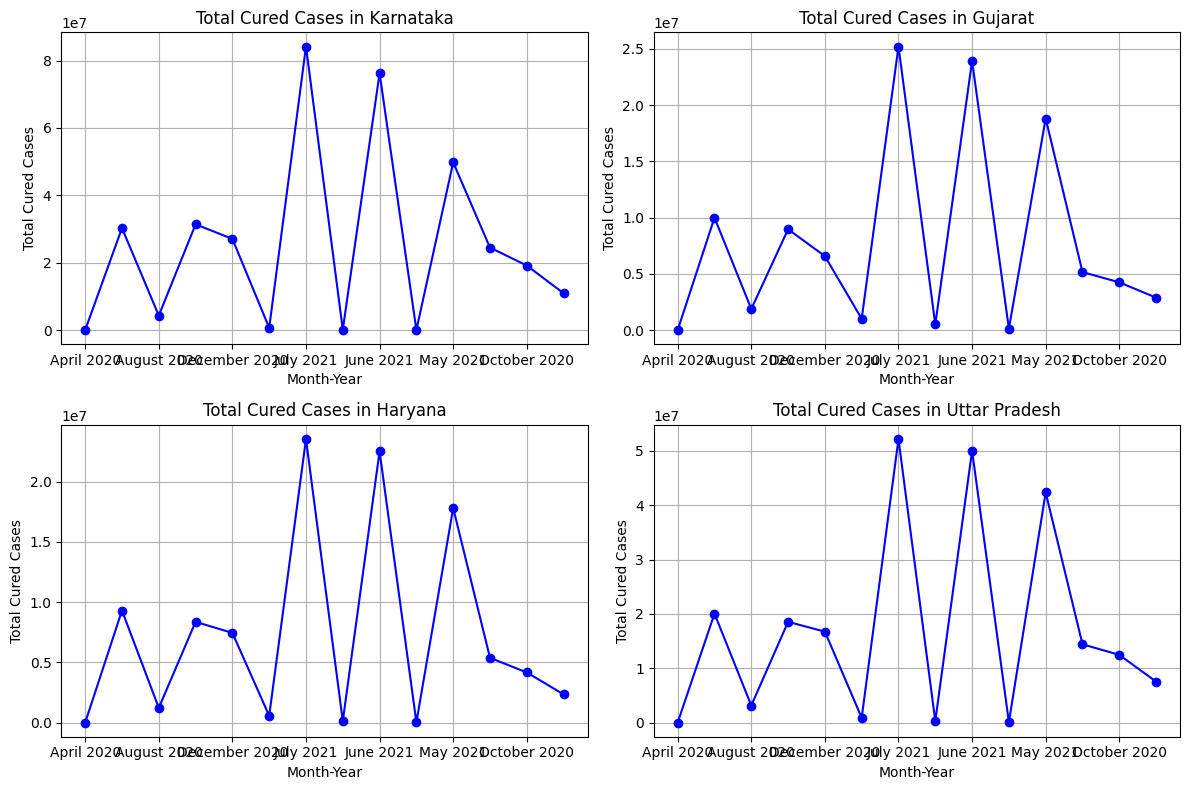

In [3]:
import matplotlib.pyplot as plt

# Filter data for the specified states and date range
selected_states = ['Karnataka', 'Gujarat', 'Haryana', 'Uttar Pradesh']
filtered_data = data[(data['State/UnionTerritory'].isin(selected_states)) & 
                     (data['Date'].dt.year.between(2020, 2021)) &
                     (data['Date'].dt.month.between(4, 12))]

# Group data by state and month to calculate total cured cases
cured_cases_monthly = filtered_data.pivot_table(index=filtered_data['Date'].dt.strftime('%B %Y'),
                                                columns='State/UnionTerritory',
                                                values='Cured',
                                                aggfunc='sum')

# Create subplots for each state
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
for idx, state in enumerate(selected_states):
    ax = axes[idx // 2, idx % 2]
    cured_cases_monthly[state].plot(ax=ax, kind='line', marker='o', color='blue')
    ax.set_title(f'Total Cured Cases in {state}')
    ax.set_xlabel('Month-Year')
    ax.set_ylabel('Total Cured Cases')
    ax.grid(True)
plt.tight_layout()
plt.show()


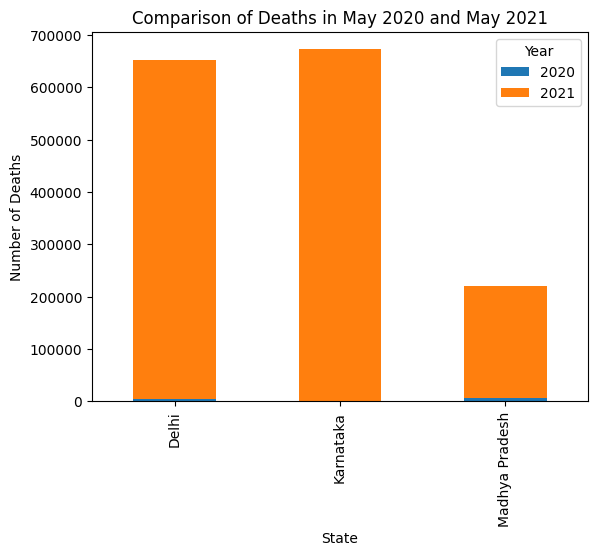

In [4]:
# Filter data for the specified states and May of 2020 and 2021
selected_states = ['Karnataka', 'Delhi', 'Madhya Pradesh']
filtered_data = data[(data['State/UnionTerritory'].isin(selected_states)) &
                     ((data['Date'].dt.year == 2020) | (data['Date'].dt.year == 2021)) &
                     (data['Date'].dt.month == 5)]

# Pivot table for deaths in May 2020 and May 2021
deaths_comparison = filtered_data.pivot_table(index='State/UnionTerritory',
                                             columns=filtered_data['Date'].dt.year,
                                             values='Deaths',
                                             aggfunc='sum')

# Plotting stacked bar chart
deaths_comparison.plot(kind='bar', stacked=True)
plt.title('Comparison of Deaths in May 2020 and May 2021')
plt.xlabel('State')
plt.ylabel('Number of Deaths')
plt.legend(title='Year')
plt.show()


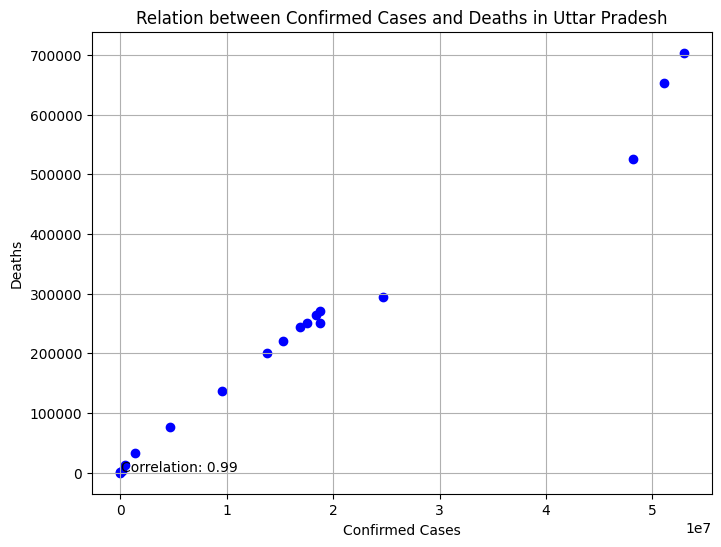

In [6]:
# Filter data for Uttar Pradesh
up_data = data[data['State/UnionTerritory'] == 'Uttar Pradesh']

# Group data by month and calculate the sum of confirmed cases and deaths
up_monthly_data = up_data.groupby(up_data['Date'].dt.strftime('%B %Y')).agg({
    'Confirmed': 'sum',
    'Deaths': 'sum'
})

# Calculate correlation between confirmed cases and deaths
correlation = up_monthly_data['Confirmed'].corr(up_monthly_data['Deaths'])

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(up_monthly_data['Confirmed'], up_monthly_data['Deaths'], color='blue')
plt.title('Relation between Confirmed Cases and Deaths in Uttar Pradesh')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.text(50000, 3000, f'Correlation: {correlation:.2f}', fontsize=10)
plt.grid(True)
plt.show()
